In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn import metrics
from keras.regularizers import l1,l2
from keras.models import load_model

In [ ]:
df = pd.read_csv('diabetes.csv')

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df_label = df['Outcome']
copy_data = df.copy()
copy_data.drop(['Outcome'], axis = 1, inplace = True)

In [ ]:
label = []
for lab in df_label:
    if lab == 1:
        label.append([1, 0])  # class 1
    elif lab == 0:
        label.append([0, 1])  # class 0

In [ ]:
data = np.array(copy_data)
label = np.array(label)
print(data.shape,label.shape)

(768, 8) (768, 2)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(copy_data, label, test_size=0.2,random_state=100)

### **L2 Regularization** 

In [ ]:
# define the keras model
model1 = Sequential()
model1.add(Dense(500, input_dim=8, activation='sigmoid',kernel_regularizer=l2(0.0001),bias_regularizer=l2(0.0001),activity_regularizer=l2(0.0001)))
model1.add(Dense(100, activation='sigmoid',kernel_regularizer=l2(0.0001),bias_regularizer=l2(0.0001),activity_regularizer=l2(0.0001)))
model1.add(Dense(2, activation='softmax'))

In [ ]:
# compile the keras model
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model1.fit(X_train, y_train, epochs=1000, batch_size=70, verbose=0)

In [ ]:
# evaluate the keras model
_, train_accuracy1 = model1.evaluate(X_train, y_train, verbose=0)
_, test_accuracy1 = model1.evaluate(X_test, y_test, verbose=0)
print('Train Accuracy: %.2f, Test Accuracy: %.2f' % (train_accuracy1*100,test_accuracy1*100))

Train Accuracy: 97.56, Test Accuracy: 66.88


In [ ]:
# make class predictions with the model
y_pred1 = model1.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
y_test_maxidx1=np.argmax(y_test, axis=1)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test_maxidx1, y_pred1))
print("f1 score:",metrics.f1_score(y_test_maxidx1, y_pred1))
print("Precision:",metrics.precision_score(y_test_maxidx1, y_pred1))
print("Recall:",metrics.recall_score(y_test_maxidx1, y_pred1))

Accuracy: 0.6688311688311688
f1 score: 0.748768472906404
Precision: 0.7450980392156863
Recall: 0.7524752475247525


### **L1 Regularization** 

In [ ]:
# define the keras model
model2 = Sequential()
model2.add(Dense(500, input_dim=8, activation='sigmoid',kernel_regularizer=l1(0.0001),bias_regularizer=l1(0.0001),activity_regularizer=l1(0.0001)))
model2.add(Dense(100, activation='sigmoid',kernel_regularizer=l1(0.0001),bias_regularizer=l1(0.0001),activity_regularizer=l1(0.0001)))
model2.add(Dense(2, activation='softmax'))

In [ ]:
# compile the keras model
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model2.fit(X_train, y_train, epochs=1000, batch_size=70, verbose=0)

In [ ]:
# evaluate the keras model
_, train_accuracy2 = model2.evaluate(X_train, y_train, verbose=0)
_, test_accuracy2 = model2.evaluate(X_test, y_test, verbose=0)
print('Train Accuracy: %.2f, Test Accuracy: %.2f' % (train_accuracy2*100,test_accuracy2*100))

Train Accuracy: 95.11, Test Accuracy: 70.13


In [ ]:
# make class predictions with the model
y_pred2 = model2.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
y_test_maxidx2=np.argmax(y_test, axis=1)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test_maxidx2, y_pred2))
print("f1 score:",metrics.f1_score(y_test_maxidx2, y_pred2))
print("Precision:",metrics.precision_score(y_test_maxidx2, y_pred2))
print("Recall:",metrics.recall_score(y_test_maxidx2, y_pred2))

Accuracy: 0.7012987012987013
f1 score: 0.7788461538461539
Precision: 0.7570093457943925
Recall: 0.801980198019802


### **Dropout** 

In [ ]:
# define the keras model
model3 = Sequential()

model3.add(Dense(500, input_dim=8, activation='sigmoid'))
model3.add(Dropout(0.3,noise_shape=None, seed=None))

model3.add(Dense(100, activation='sigmoid'))
model3.add(Dropout(0.2,noise_shape=None, seed=None))

model3.add(Dense(2, activation='softmax'))

In [ ]:
# compile the keras model
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model3.fit(X_train, y_train, epochs=1000, batch_size=70, verbose=0)

In [ ]:
# evaluate the keras model
_, train_accuracy3 = model3.evaluate(X_train, y_train, verbose=0)
_, test_accuracy3 = model3.evaluate(X_test, y_test, verbose=0)
print('Train Accuracy: %.2f, Test Accuracy: %.2f' % (train_accuracy3*100,test_accuracy3*100))

Train Accuracy: 93.97, Test Accuracy: 74.68


In [ ]:
# make class predictions with the model
y_pred3 = model3.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
y_test_maxidx3=np.argmax(y_test, axis=1)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test_maxidx3, y_pred3))
print("f1 score:",metrics.f1_score(y_test_maxidx3, y_pred3))
print("Precision:",metrics.precision_score(y_test_maxidx3, y_pred3))
print("Recall:",metrics.recall_score(y_test_maxidx3, y_pred3))

Accuracy: 0.7467532467532467
f1 score: 0.8115942028985508
Precision: 0.7924528301886793
Recall: 0.8316831683168316


### **Early Stopping** 

In [ ]:
# define the keras model
model4 = Sequential()
model4.add(Dense(500, input_dim=8, activation='sigmoid'))
model4.add(Dense(100, activation='sigmoid'))
model4.add(Dense(2, activation='softmax'))

In [ ]:
# compile the keras model
model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Early stopping with model checkpoint
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=50)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit the keras model on the dataset
model4.fit(X_train, y_train,validation_split=0.3, epochs=1000, batch_size=70, verbose=0,callbacks=[early_stopping, model_checkpoint]) 

In [ ]:
# load the saved model
saved_model = load_model('best_model.h5')

In [ ]:
# evaluate the keras model
_, train_accuracy4 = model4.evaluate(X_train, y_train, verbose=0)
_, test_accuracy4 = model4.evaluate(X_test, y_test, verbose=0)
print('Train Accuracy: %.2f, Test Accuracy: %.2f' % (train_accuracy4*100,test_accuracy4*100))

Train Accuracy: 79.15, Test Accuracy: 70.78


In [ ]:
# make class predictions with the model
y_pred4 = model4.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
y_test_maxidx4=np.argmax(y_test, axis=1)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test_maxidx4, y_pred4))
print("f1 score:",metrics.f1_score(y_test_maxidx4, y_pred4))
print("Precision:",metrics.precision_score(y_test_maxidx4, y_pred4))
print("Recall:",metrics.recall_score(y_test_maxidx4, y_pred4))

Accuracy: 0.7077922077922078
f1 score: 0.7540983606557378
Precision: 0.8414634146341463
Recall: 0.6831683168316832


**Comparision table:** 


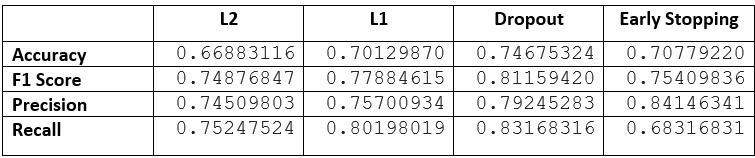 

**Parameters for each regularization:**

L2 : kernel_regularizer=l2(0.0001),bias_regularizer=l2(0.0001),activity_regularizer=l2(0.0001)

L1: kernel_regularizer=l1(0.0001),bias_regularizer=l1(0.0001),activity_regularizer=l1(0.0001)

Dropout: In first hidden layer dropout of 0.3 taken and in second hidden layer dropout of 0.2 taken.

Early Stopping: Minimum Validation loss considered with patience=50.

**Inference**

If we take accuracy and F1 score in consideraton, we can say that dropout performs better compare to others. then early stopping and L1 performs almost similar and then L2.

If we take precision in consideraton, Early stopping performs better compare to others. Then dropout,L1 and L2 in descending order.

If we take Recall in consideraton, Dropout performs better compare to others. Then L1, L2 and earlystopping in descending order.

